In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 22s 682ms/step - loss: 0.6835 - accuracy: 0.5505 - val_loss: 0.6044 - val_accuracy: 0.7419
Epoch 2/20
31/31 [==============================] - 21s 690ms/step - loss: 0.5556 - accuracy: 0.7303 - val_loss: 0.4042 - val_accuracy: 0.8710
Epoch 3/20
31/31 [==============================] - 20s 646ms/step - loss: 0.3556 - accuracy: 0.8636 - val_loss: 0.2451 - val_accuracy: 0.9153
Epoch 4/20
31/31 [==============================] - 20s 640ms/step - loss: 0.2450 - accuracy: 0.9081 - val_loss: 0.3221 - val_accuracy: 0.8589
Epoch 5/20
31/31 [==============================] - 28s 915ms/step - loss: 0.2201 - accuracy: 0.9111 - val_loss: 0.1822 - val_accuracy: 0.9315
Epoch 6/20
31/31 [==============================] - 26s 842ms/step - loss: 0.1493 - accuracy: 0.9505 - val_loss: 0.1818 - val_accuracy: 0.9274
Epoch 7/20
31/31 [==============================] - 26s 827ms/step - loss: 0.1127 - accuracy: 0.9626 - val_loss: 0.1637 - val_accuracy: 0.9476

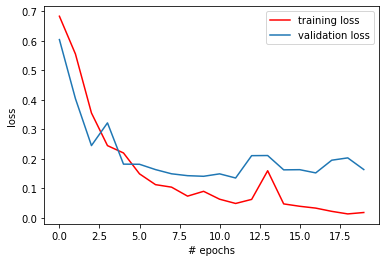

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

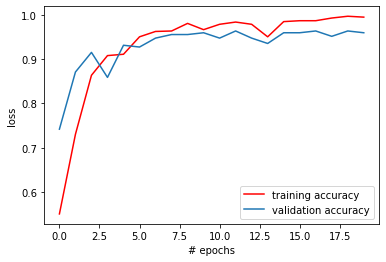

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 140ms/step - loss: 0.0571 - accuracy: 0.9855
[0.05709021911025047, 0.9855072498321533]


In [9]:
prediction = (model.predict(test_data) > 0.5).astype("int32")

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(test_target, prediction))
print(confusion_matrix(test_target.argmax(axis=1), prediction.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.99      0.99      0.99        81

   micro avg       0.99      0.99      0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138
 samples avg       0.99      0.99      0.99       138

[[56  1]
 [ 1 80]]
